In [1]:
import time
import matplotlib.pyplot as plt

Our code for "Target game"

In [2]:
"""Target game"""
import random
def my_generate_grid() -> list[list[str]]:
    """
    Generates list of lists of letters - i.e. grid for the game.
    e.g. [['I', 'G', 'E'], ['P', 'I', 'S'], ['W', 'M', 'G']]
    """
    abc_consonents = "BCDFGHJKLMNPQRSTVWXYZ"
    abc_vowels = "AEIOU"
    lst1 = []
    lst2 = []
    lst3 = []
    for _ in range(6):
        rand_consonent = abc_consonents[random.randint(0, len(abc_consonents) - 1)]
        if len(lst1) != 2:
            lst1.append(rand_consonent)
        elif len(lst2) != 2:
            lst2.append(rand_consonent)
        elif len(lst3) != 2:
            lst3.append(rand_consonent)

    for _ in range(3):
        rand_vowel = abc_vowels[random.randint(0, len(abc_vowels) - 1)]
        if len(lst1) != 3:
            lst1.append(rand_vowel)
        elif len(lst2) != 3:
            lst2.append(rand_vowel)
        elif len(lst3) != 3:
            lst3.append(rand_vowel)

    random.shuffle(lst1)
    random.shuffle(lst2)
    random.shuffle(lst3)

    lst = [lst1, lst2, lst3]
    return lst

def my_get_words(file: str, letters: list[str]) -> list[str]:
    """
    Reads the file f. Checks the words with rules and returns a list of words.
    >>> get_words('en.txt', ['h', 'e', 'l', 'l', 'k', 'r', 'f', 'x', 'p'])
    ['ferk', 'kell', 'kelp', 'kerf', 'perk']
    >>> get_words(123, ['g', 'l'])

    """
    if isinstance(file, str) and isinstance(letters, list):
        with open(file, "r", encoding='utf-8') as file_:
            words = []
            for line in file_:
                line = line[:-1].lower()
                if len(line) >= 4 and letters[4] in line:
                    test = 0
                    for letter in line:
                        if letter not in letters or line.count(letter) > letters.count(letter):
                            test = 1
                            break
                    if test == 1:
                        continue
                    words.append(line)
        return words

def my_get_user_words() -> list[str]:
    """
    Gets words from user input and returns a list with these words.
    Usage: enter a word or press ctrl+d to finish for *nix or Ctrl-Z+Enter 
    for Windows.
    Note: the user presses the enter key after entering each word.
    """
    user_answer = []
    while True:
        try:
            answer = input(">>> ")
            user_answer.append(answer)
        except EOFError:
            break
    return user_answer

def my_get_pure_user_words(user_words: list[str], letters: list[str], \
    words_from_dict: list[str]) -> list[str]:
    """
    Checks user words with the rules and returns list of those words
    that are not in dictionary.
    >>> get_pure_user_words(['ferk', 'kelp', 'plek'], ['h', 'e', 'l', 'l', \
    'k', 'r', 'f', 'x', 'p'], ['ferk', 'kell', 'kelp', 'kerf', 'perk'])
    ['plek']
    >>> get_pure_user_words('lhfa', 'asdfsdf', 'asdf')

    """
    if isinstance(user_words, list) and isinstance(letters, list) and \
        isinstance(words_from_dict, list):
        pure_lst = []
        for element in user_words:
            if len(element) >= 4 and letters[4] in element:
                test = 0
                for i in element:
                    if i not in letters or element.count(i) > letters.count(i):
                        test = 1
                        break
                if test == 1:
                    continue
                if element not in words_from_dict:
                    pure_lst.append(element)
        return pure_lst

def my_main():
    """
    Main function for target game
    """
    lst = my_generate_grid()
    print(f"Your board is {lst}")

    print("Please, suggest your words here:")
    user_words_lst = my_get_user_words()

    new_lst = []
    for item in lst:
        for element in item:
            new_lst.append(element.lower())
    possible_words = my_get_words("en.txt", new_lst)

    right_words = []
    for word in user_words_lst:
        if word in possible_words:
            right_words.append(word)

    print(f"Number of possible words: {len(right_words)}")
    print(f"All posible words: {possible_words}")

    words_from_dict_set = set(possible_words)
    user_words_set = set(user_words_lst)
    wrong_words_ = words_from_dict_set.difference(user_words_set)
    wrong_words_ = list(wrong_words_)

    print(f"You missed the following words: {wrong_words_}")

    pure_words = my_get_pure_user_words(user_words_lst, new_lst, possible_words)
    print(f"You suggest, but we don`t have them in the dictionary: {pure_words}")

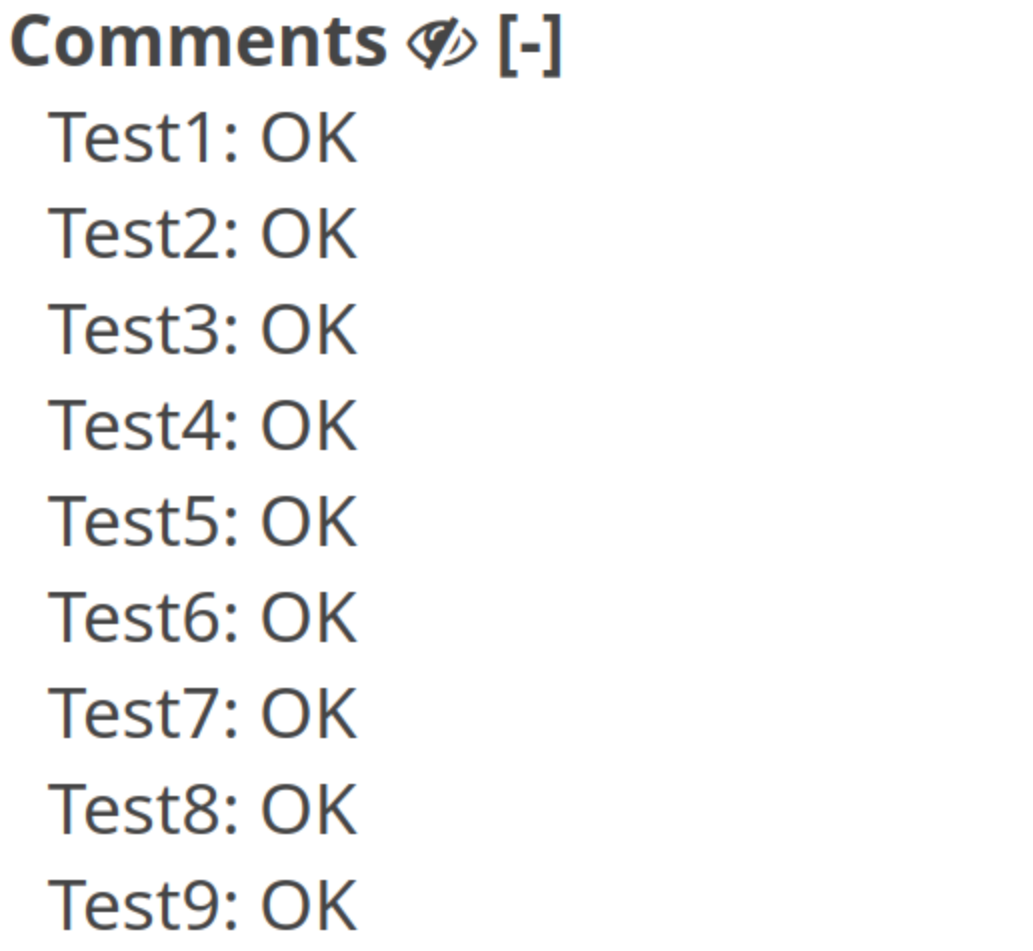

As you can see, all tests are passed.

Request 1: Can you optimize provided code according to the task?

Generated code:

In [3]:
import random

def generate_grid():
    """Generates a 3x3 grid with at least 3 vowels."""
    vowels = 'aeiou'
    consonants = 'bcdfghjklmnpqrstvwxyz'
    grid = []
    vowels_used = 0

    # Fill the grid with random letters, ensuring at least 3 vowels
    while len(grid) < 9:
        letter = random.choice(vowels if vowels_used < 3 else consonants)
        grid.append(letter)
        if letter in vowels:
            vowels_used += 1

    # Reshape the list into a 3x3 grid
    return [grid[i:i+3] for i in range(0, 9, 3)]

def get_words(filename, letters):
    """Reads words from a file and returns valid words based on the grid."""
    with open(filename, 'r', encoding='utf-8') as f:
        words = [word.lower().strip() for word in f]  # Read, lowercase, and strip

    valid_words = []
    for word in words:
        if len(word) < 4 or letters[4] not in word:
            continue
        # Check if word can be formed using available letters
        for char in word:
            if word.count(char) > letters.count(char):
                break
        else:
            valid_words.append(word)

    return valid_words

def get_user_words():
    """Gets words from user input until 'q' is entered."""
    user_words = []
    while True:
        word = input("Enter a word (or 'q' to quit): ").lower()
        if word == 'q':
            break
        user_words.append(word)
    return user_words

def get_missed_words(user_words, valid_words):
    """Returns words from user input that are not in the valid words list."""
    return [word for word in user_words if word not in valid_words]

def get_pure_user_words(user_words, letters):
    """Returns words from user input that don't follow the game rules."""
    incorrect_words = []
    for word in user_words:
        if len(word) < 4 or letters[4] not in word:
            incorrect_words.append(word)
        else:
            for char in word:
                if word.count(char) > letters.count(char):
                    break
            else:
                # Word follows rules but might not be in dictionary - handled later
                pass
    return incorrect_words

def main():
    """Main function for the Target game."""
    grid = generate_grid()
    print(f"Your board is: {grid}")

    print("Enter your words:")
    user_words = get_user_words()

    flat_grid = [letter.lower() for row in grid for letter in row]
    valid_words = get_words("en.txt", flat_grid)

    correct_words = get_missed_words(user_words, valid_words)
    incorrect_words = get_pure_user_words(user_words, flat_grid)
    missed_words = get_missed_words(valid_words, user_words)

    print(f"You found {len(correct_words)} out of {len(valid_words)} possible words.")
    print(f"All possible words: {valid_words}")

    print("You missed the following words:")
    if missed_words:
        print(*missed_words, sep=", ")
    else:
        print("None!")

    print("You entered the following incorrect words:")
    if incorrect_words:
        print(*incorrect_words, sep=", ")
    else:
        print("None!")

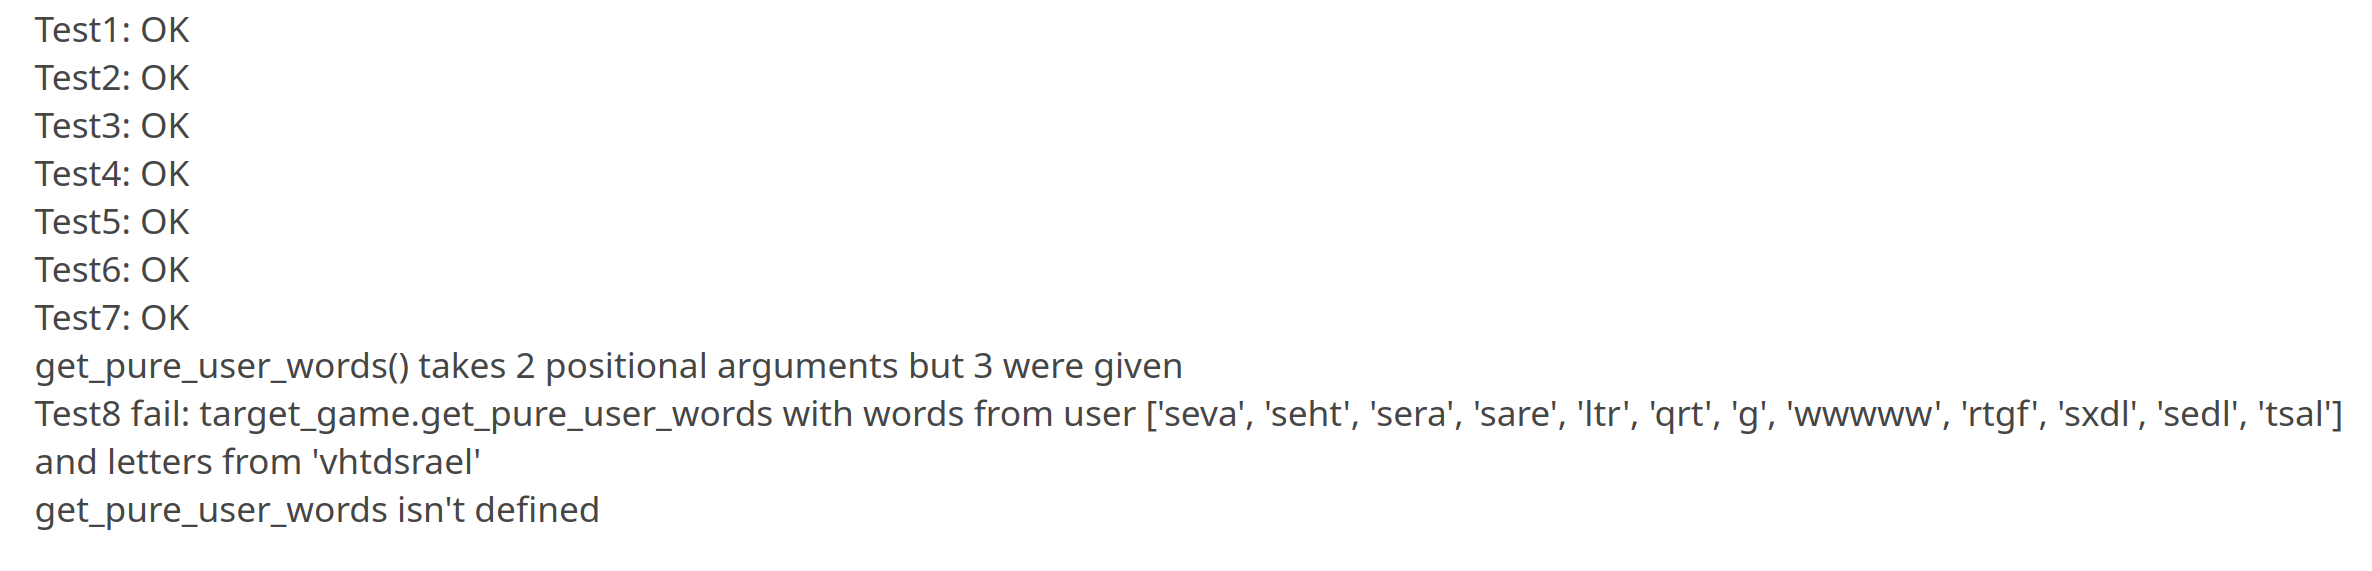

Request 2: get_pure_user_words() takes 2 positional arguments but 3 were given
 Test8 fail: target_game.get_pure_user_words with words from user ['seva', 'seht', 'sera', 'sare', 'ltr', 'qrt', 'g', 'wwwww', 'rtgf', 'sxdl', 'sedl', 'tsal'] and letters from 'vhtdsrael'
 get_pure_user_words isn't defined

Generated code:

In [4]:
import random

def generate_grid():
    """Generates a 3x3 grid with at least 3 vowels."""
    vowels = 'aeiou'
    consonants = 'bcdfghjklmnpqrstvwxyz'
    grid = []
    vowels_used = 0

    # Fill the grid with random letters, ensuring at least 3 vowels
    while len(grid) < 9:
        letter = random.choice(vowels if vowels_used < 3 else consonants)
        grid.append(letter)
        if letter in vowels:
            vowels_used += 1

    # Reshape the list into a 3x3 grid
    return [grid[i:i+3] for i in range(0, 9, 3)]

def get_words(filename, letters):
    """Reads words from a file and returns valid words based on the grid."""
    with open(filename, 'r', encoding='utf-8') as f:
        words = [word.lower().strip() for word in f]  # Read, lowercase, and strip

    valid_words = []
    for word in words:
        if len(word) < 4 or letters[4] not in word:
            continue
        # Check if word can be formed using available letters
        for char in word:
            if word.count(char) > letters.count(char):
                break
        else:
            valid_words.append(word)

    return valid_words

def get_user_words():
    """Gets words from user input until 'q' is entered."""
    user_words = []
    while True:
        word = input("Enter a word (or 'q' to quit): ").lower()
        if word == 'q':
            break
        user_words.append(word)
    return user_words

def get_missed_words(user_words, valid_words):
    """Returns words from user input that are not in the valid words list."""
    return [word for word in user_words if word not in valid_words]

def get_pure_user_words(user_words, letters):
    """Returns words from user input that don't follow the game rules."""
    incorrect_words = []
    for word in user_words:
        if len(word) < 4 or letters[4] not in word:
            incorrect_words.append(word)
        else:
            for char in word:
                if word.count(char) > letters.count(char):
                    break
            else:
                # Word follows rules but might not be in dictionary
                pass
    return incorrect_words

def main():
    """Main function for the Target game."""
    grid = generate_grid()
    print(f"Your board is: {grid}")

    print("Enter your words:")
    user_words = get_user_words()

    flat_grid = [letter.lower() for row in grid for letter in row]
    valid_words = get_words("en.txt", flat_grid)

    correct_words = get_missed_words(user_words, valid_words)
    incorrect_words = get_pure_user_words(user_words, flat_grid)
    missed_words = get_missed_words(valid_words, user_words)

    print(f"You found {len(correct_words)} out of {len(valid_words)} possible words.")
    print(f"All possible words: {valid_words}")

    print("You missed the following words:")
    if missed_words:
        print(*missed_words, sep=", ")
    else:
        print("None!")

    print("You entered the following incorrect words:")
    if incorrect_words:
        print(*incorrect_words, sep=", ")
    else:
        print("None!")

After generating new code, nothing changed

Our remake of generated code (get_pure_user_words function was remade):

In [5]:
import random

def generate_grid():
    """Generates a 3x3 grid with at least 3 vowels."""
    vowels = 'aeiou'
    consonants = 'bcdfghjklmnpqrstvwxyz'
    grid = []
    vowels_used = 0

    # Fill the grid with random letters, ensuring at least 3 vowels
    while len(grid) < 9:
        letter = random.choice(vowels if vowels_used < 3 else consonants)
        grid.append(letter)
        if letter in vowels:
            vowels_used += 1

    # Reshape the list into a 3x3 grid
    return [grid[i:i+3] for i in range(0, 9, 3)]

def get_words(filename, letters):
    """Reads words from a file and returns valid words based on the grid."""
    with open(filename, 'r', encoding='utf-8') as f:
        words = [word.lower().strip() for word in f]  # Read, lowercase, and strip

    valid_words = []
    for word in words:
        if len(word) < 4 or letters[4] not in word:
            continue
        # Check if word can be formed using available letters
        for char in word:
            if word.count(char) > letters.count(char):
                break
        else:
            valid_words.append(word)

    return valid_words

def get_user_words():
    """Gets words from user input until 'q' is entered."""
    user_words = []
    while True:
        word = input("Enter a word (or 'q' to quit): ").lower()
        if word == 'q':
            break
        user_words.append(word)
    return user_words

def get_missed_words(user_words, valid_words):
    """Returns words from user input that are not in the valid words list."""
    return [word for word in user_words if word not in valid_words]

def get_pure_user_words(user_words: list[str], letters: list[str], words_from_dict: list[str]) -> list[str]:
    """
    Checks user words with the rules and returns list of those words
    that are not in the dictionary.
    """
    grid_counts = {letter: letters.count(letter) for letter in set(letters)}
    pure_words = []
    for word in user_words:
        if len(word) < 4 or letters[4] not in word:
            continue
        word_count = {letter: word.count(letter) for letter in set(word)}
        if any(word_count.get(letter, 0) > grid_counts.get(letter, 0) for letter in set(word)):
            continue
        if word not in words_from_dict:
            pure_words.append(word)
    return pure_words


def main():
    """Main function for the Target game."""
    grid = generate_grid()
    print(f"Your board is: {grid}")

    print("Enter your words:")
    user_words = get_user_words()

    flat_grid = [letter.lower() for row in grid for letter in row]
    valid_words = get_words("en.txt", flat_grid)

    correct_words = get_missed_words(user_words, valid_words)
    incorrect_words = get_pure_user_words(user_words, flat_grid, valid_words)
    missed_words = get_missed_words(valid_words, user_words)

    print(f"You found {len(correct_words)} out of {len(valid_words)} possible words.")
    print(f"All possible words: {valid_words}")

    print("You missed the following words:")
    if missed_words:
        print(*missed_words, sep=", ")
    else:
        print("None!")

    print("You entered the following incorrect words:")
    if incorrect_words:
        print(*incorrect_words, sep=", ")
    else:
        print("None!")

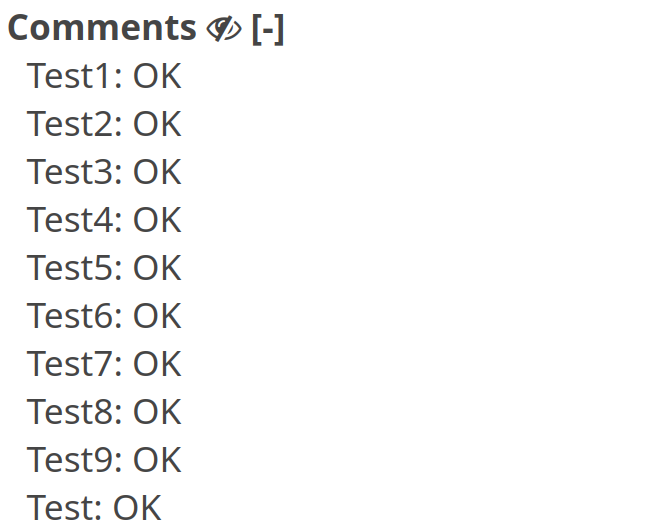

Fuction for measuring time:

In [8]:
def measure_time():
    # Initialize lists to store execution times
    execution_times_gemini = []
    execution_times_your_code = []

    for _ in range(100):
        # Measure time for gemini code
        start_time = time.time()
        generate_grid()
        get_words("en.txt", ['h', 'e', 'l', 'l', 'k', 'r', 'f', 'x', 'p'])
        get_pure_user_words(['ferk', 'kelp', 'plek'], ['h', 'e', 'l', 'l', \
        'k', 'r', 'f', 'x', 'p'], ['ferk', 'kell', 'kelp', 'kerf', 'perk'])
        end_time = time.time()
        execution_time_gemini = end_time - start_time
        execution_times_gemini.append(execution_time_gemini)

        # Measure time for your code
        start_time = time.time()
        my_generate_grid()
        my_get_words("en.txt", ['h', 'e', 'l', 'l', 'k', 'r', 'f', 'x', 'p'])
        my_get_pure_user_words(['ferk', 'kelp', 'plek'], ['h', 'e', 'l', 'l', \
        'k', 'r', 'f', 'x', 'p'], ['ferk', 'kell', 'kelp', 'kerf', 'perk'])
        end_time = time.time()
        execution_time_your_code = end_time - start_time
        execution_times_your_code.append(execution_time_your_code)

    # Plotting the graph
    plt.plot(range(1, 101), execution_times_gemini, label='Gemini code')
    plt.plot(range(1, 101), execution_times_your_code, label='My code')
    plt.xlabel('Iteration')
    plt.ylabel('Execution Time (seconds)')
    plt.title('Execution Time Comparison')
    plt.legend()
    plt.show()

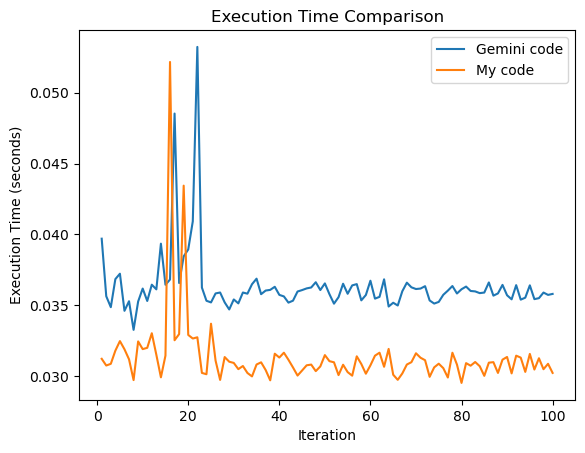

In [9]:
measure_time()